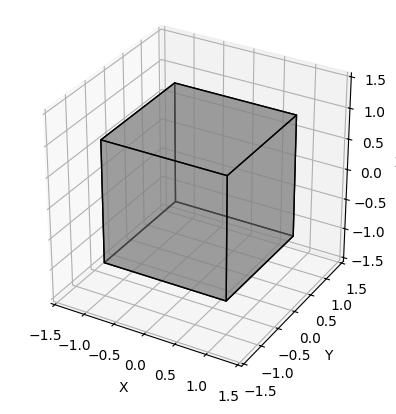

In [5]:
#Below is working code to plot a gray cube in 3D


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from transforms3d.quaternions import quat2mat


# Define vertices of a cube
vertices = np.array([[1, 1, 1],
                     [1, 1, -1],
                     [1, -1, -1],
                     [1, -1, 1],
                     [-1, 1, 1],
                     [-1, 1, -1],
                     [-1, -1, -1],
                     [-1, -1, 1]])

# Define edges of the cube
edges = [[0, 1], [1, 2], [2, 3], [3, 0],
         [4, 5], [5, 6], [6, 7], [7, 4],
         [0, 4], [1, 5], [2, 6], [3, 7]]

# Define faces of the cube
faces = [[vertices[j] for j in [0, 1, 2, 3]],
         [vertices[j] for j in [4, 5, 6, 7]],
         [vertices[j] for j in [0, 1, 5, 4]],
         [vertices[j] for j in [2, 3, 7, 6]],
         [vertices[j] for j in [0, 3, 7, 4]],
         [vertices[j] for j in [1, 2, 6, 5]]]

# Plot the cube
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

'''
for edge in edges:
    ax.plot3D(*zip(*vertices[edge]), color='gray')
'''

# Plot each face of the cube as a polygon
cube_faces = Poly3DCollection(faces, alpha=0.5, linewidths=1, edgecolors='k', facecolors='gray')
ax.add_collection3d(cube_faces)

# Set the limits of the axes
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Set the aspect ratio of the plot to be equal
ax.set_box_aspect([1,1,1])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()



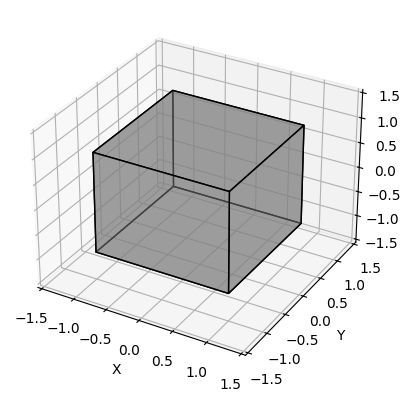

In [15]:
#Adding to our work in the above cell, we are going
#to set the cubes orientation with a quaternion

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from transforms3d.quaternions import quat2mat, qmult, qinverse

# Define vertices of a cube centered at the origin
vertices = np.array([[1, 1, 1],
                     [1, 1, -1],
                     [1, -1, -1],
                     [1, -1, 1],
                     [-1, 1, 1],
                     [-1, 1, -1],
                     [-1, -1, -1],
                     [-1, -1, 1]])

# Define edges of the cube
edges = [[0, 1], [1, 2], [2, 3], [3, 0],
         [4, 5], [5, 6], [6, 7], [7, 4],
         [0, 4], [1, 5], [2, 6], [3, 7]]

# Define faces of the cube
faces = [[vertices[j] for j in [0, 1, 2, 3]],
         [vertices[j] for j in [4, 5, 6, 7]],
         [vertices[j] for j in [0, 1, 5, 4]],
         [vertices[j] for j in [2, 3, 7, 6]],
         [vertices[j] for j in [0, 3, 7, 4]],
         [vertices[j] for j in [1, 2, 6, 5]]]



# Function to rotate the cube vertices based on a quaternion orientation
def rotate_cube(quaternion):
    # Conjugate of the quaternion for the operation
    q_conjugate = quaternion.copy()
    q_conjugate[0] *= -1
    
    # Rotate each vertex individually and reconnect them
    rotated_vertices = np.array([qmult(quaternion, qmult([0] + vertex.tolist(), q_conjugate))[1:] for vertex in vertices])
    
    return rotated_vertices



# Function to plot the rotated cube
def plot_rotated_cube(rotated_vertices):
    # Plot the cube
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each face of the cube as a polygon
    cube_faces = Poly3DCollection(faces, alpha=0.5, linewidths=1, edgecolors='k', facecolors='gray')
    ax.add_collection3d(cube_faces)

    # Set the limits of the axes
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Example quaternion orientation
quaternion = np.array([1, 0, 0, 0])  # No rotation (identity quaternion)

# Rotate the cube vertices based on the quaternion orientation
rotated_vertices = rotate_cube(quaternion)

# Plot the rotated cube
plot_rotated_cube(rotated_vertices)